## Data Augmentation - `TensorFlow`
A technique to increase the diversity of training set by applying random (but realistic) transformations such as image rotation.

#### Imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

> Loading the dataset. We are going to use the `tf_flowers` dataset.


In [3]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [11]:
class_names = [metadata.features['label'].int2str(i) for i in range(5)]
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

### The Keras preprocessing layers
The Keras preprocessing layers API allows us to build Keras-native input processing pipelines.
* We can preprocess input and using the `Sequantial` API and then pass them as a layer in a `NN`.
* [Preprocesing Text, images, etc](https://keras.io/guides/preprocessing_layers/) using keras


In [13]:
image, label = next(iter(train_ds))
#image, label

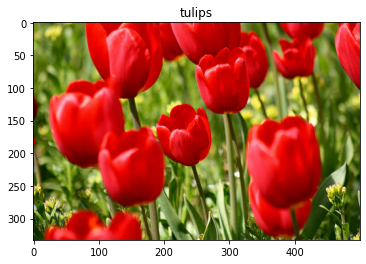

In [14]:
plt.imshow(image)
plt.title(class_names[label])
plt.show()

Now we want to do transformations on this image.

In [16]:
IMG_SIZE = 180
resize_and_rescale = keras.Sequential([
  keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  keras.layers.experimental.preprocessing.Rescaling(1./255)
])

image_output = resize_and_rescale(image)

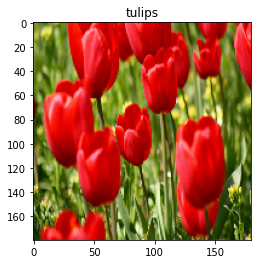

In [17]:
plt.imshow(image_output)
plt.title(class_names[label])
plt.show()

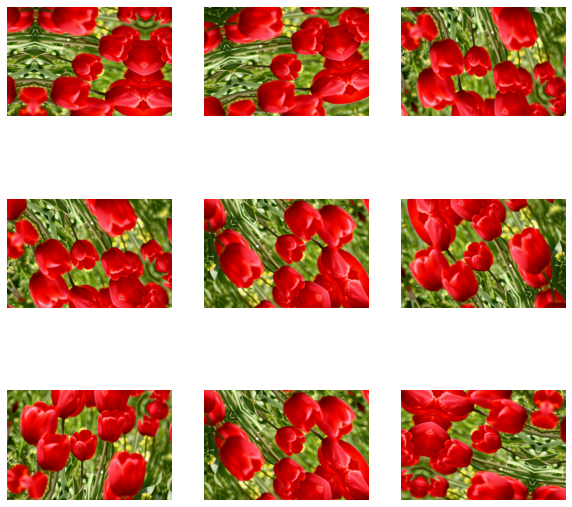

In [24]:
data_augmentation = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  keras.layers.experimental.preprocessing.RandomRotation(0.5),
])
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(tf.expand_dims(image, 0))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

As we can see from a single image we now have different lokking images of the same flower.
* [TFTutorial- Docs](https://keras.io/guides/preprocessing_layers/)
* [Keras Docs](https://www.tensorflow.org/tutorials/images/data_augmentation)

### ``Tf.image`` Data argumentation.

* [tf.image](https://www.tensorflow.org/api_docs/python/tf/image)
This is the recommended way of processing images since the `keras.Sequential` is still under experimenta.
* You have to define a function that performs transformation on an image and return the processed image.
* We can use the ``map`` function to appy the transformation to all the images in the dataset.

```python
def argument(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.image.random_brightness(image, 0.1)
    ....
    return image, label

# All images will be stransformsed to defined arguments in the fn
transformed_images = train_ds.map(argument)
```
* all transforms that we can apply are found [here](https://www.tensorflow.org/api_docs/python/tf/image)

#### Example:

> Grayscale image.

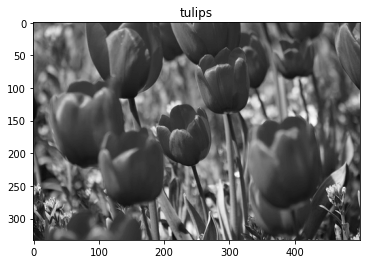

In [28]:
def augment(image):
    return tf.image.rgb_to_grayscale(image)

plt.imshow(augment(image), cmap="gray")
plt.title(class_names[label])
plt.show()